# Smartwatch Data Exploration & Cleaning 

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

smartwatch_file = 'data/unclean_smartwatch_health_data.csv'
second_file = 'data/Sleep_Health_and_Lifestyle_Dataset.csv'

df_smart = pd.read_csv(smartwatch_file)
df_sleep_health = pd.read_csv(second_file)

In [10]:
df_smart.describe()

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count
count,9799.000000,9600.000000,9700.000000,9900.000000
mean,3007.480253,76.035462,97.841581,6985.685885
std,1150.581542,19.412483,1.732863,6885.809680
min,1001.000000,40.000000,90.791208,0.910138
25%,1997.500000,64.890152,96.662683,2021.039657
50%,2998.000000,75.220601,98.010642,4962.534599
75%,4004.000000,85.198249,99.376179,9724.902880
max,4999.000000,296.593970,100.000000,62486.690753


In [33]:
df_sleep_health.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [18]:
df_sleep_health.groupby('Person ID').count()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,1,1,1,1,1,0
4,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
370,1,1,1,1,1,1,1,1,1,1,1,1
371,1,1,1,1,1,1,1,1,1,1,1,1
372,1,1,1,1,1,1,1,1,1,1,1,1


In [21]:
df_smart.groupby('User ID').count()

,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
User ID,,,,,,
1001.0,4,4,4,4,4,4
1002.0,2,2,2,2,2,2
1003.0,1,1,1,1,1,1
1004.0,1,0,1,1,1,1
1005.0,2,2,2,2,2,2
...,...,...,...,...,...,...
4995.0,1,1,1,1,1,1
4996.0,5,5,5,5,5,5
4997.0,2,2,2,2,2,2


In [ ]:
df_smart.describe()

In [ ]:
df_smart.info()

In [ ]:
df_smart['Sleep Duration (hours)'].unique()

In [ ]:
df_smart['Activity Level'].unique()

In [ ]:
df_smart['Stress Level'].unique()

# Transformations

In [23]:
print("Original entries:",len(df_smart))
print("Complete observations (before fixing typos):",len(df_smart.dropna()))

Original entries: 10000
Complete observations (before fixing typos): 8543


In [24]:
df_clean = df_smart.copy()

# Sleep Duration (hours) object -> floats 
df_clean['Sleep Duration (hours)'] = pd.to_numeric(df_clean['Sleep Duration (hours)'], errors='coerce')

# Map for Activity Level
activity_map = {'Sedentary':0, 'Seddentary':0, 
                'Active':1, 'Actve':1, 
                'Highly_Active':2,'Highly Active':2
               }
# applying map
df_clean['Activity Level'] = df_clean['Activity Level'].map(activity_map)

In [25]:
# Map for Stress Level 
stress_map = {'1':1, '2':2, '3':3, '4':4, '5':5, 
             '6':6, '7':7, '8':8, '9':9, '10':10, 'Very High':10
            }
# applying map
df_clean['Stress Level'] = df_clean['Stress Level'].map(stress_map)

In [26]:
proof = df_clean['Stress Level'].unique()
print(np.sort(proof))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. nan]


In [27]:
# Dropping rows with nan's

df_smart_clean = df_clean.dropna().copy()

# Converting Stress Level & Activity Level to integer 
df_smart_clean['Stress Level'] = df_smart_clean['Stress Level'].astype('Int64')
df_smart_clean['Activity Level'] = df_smart_clean['Activity Level'].astype('Int64')

# Validity Check

In [28]:
df_smart_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8325 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 8325 non-null   float64
 1   Heart Rate (BPM)        8325 non-null   float64
 2   Blood Oxygen Level (%)  8325 non-null   float64
 3   Step Count              8325 non-null   float64
 4   Sleep Duration (hours)  8325 non-null   float64
 5   Activity Level          8325 non-null   Int64  
 6   Stress Level            8325 non-null   Int64  
dtypes: Int64(2), float64(5)
memory usage: 536.6 KB


In [29]:
corr = df_smart_clean.corr()

<Axes: >

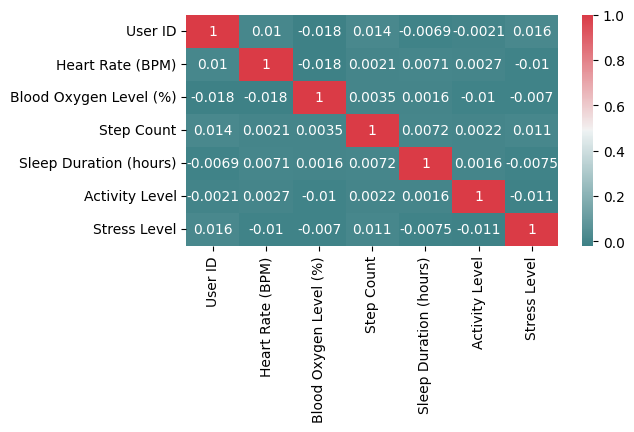

In [30]:
cmap = sns.diverging_palette(200, 10, as_cmap=True)
plt.figure(figsize=(6, 3))
sns.heatmap(corr, cmap=cmap, annot=True)

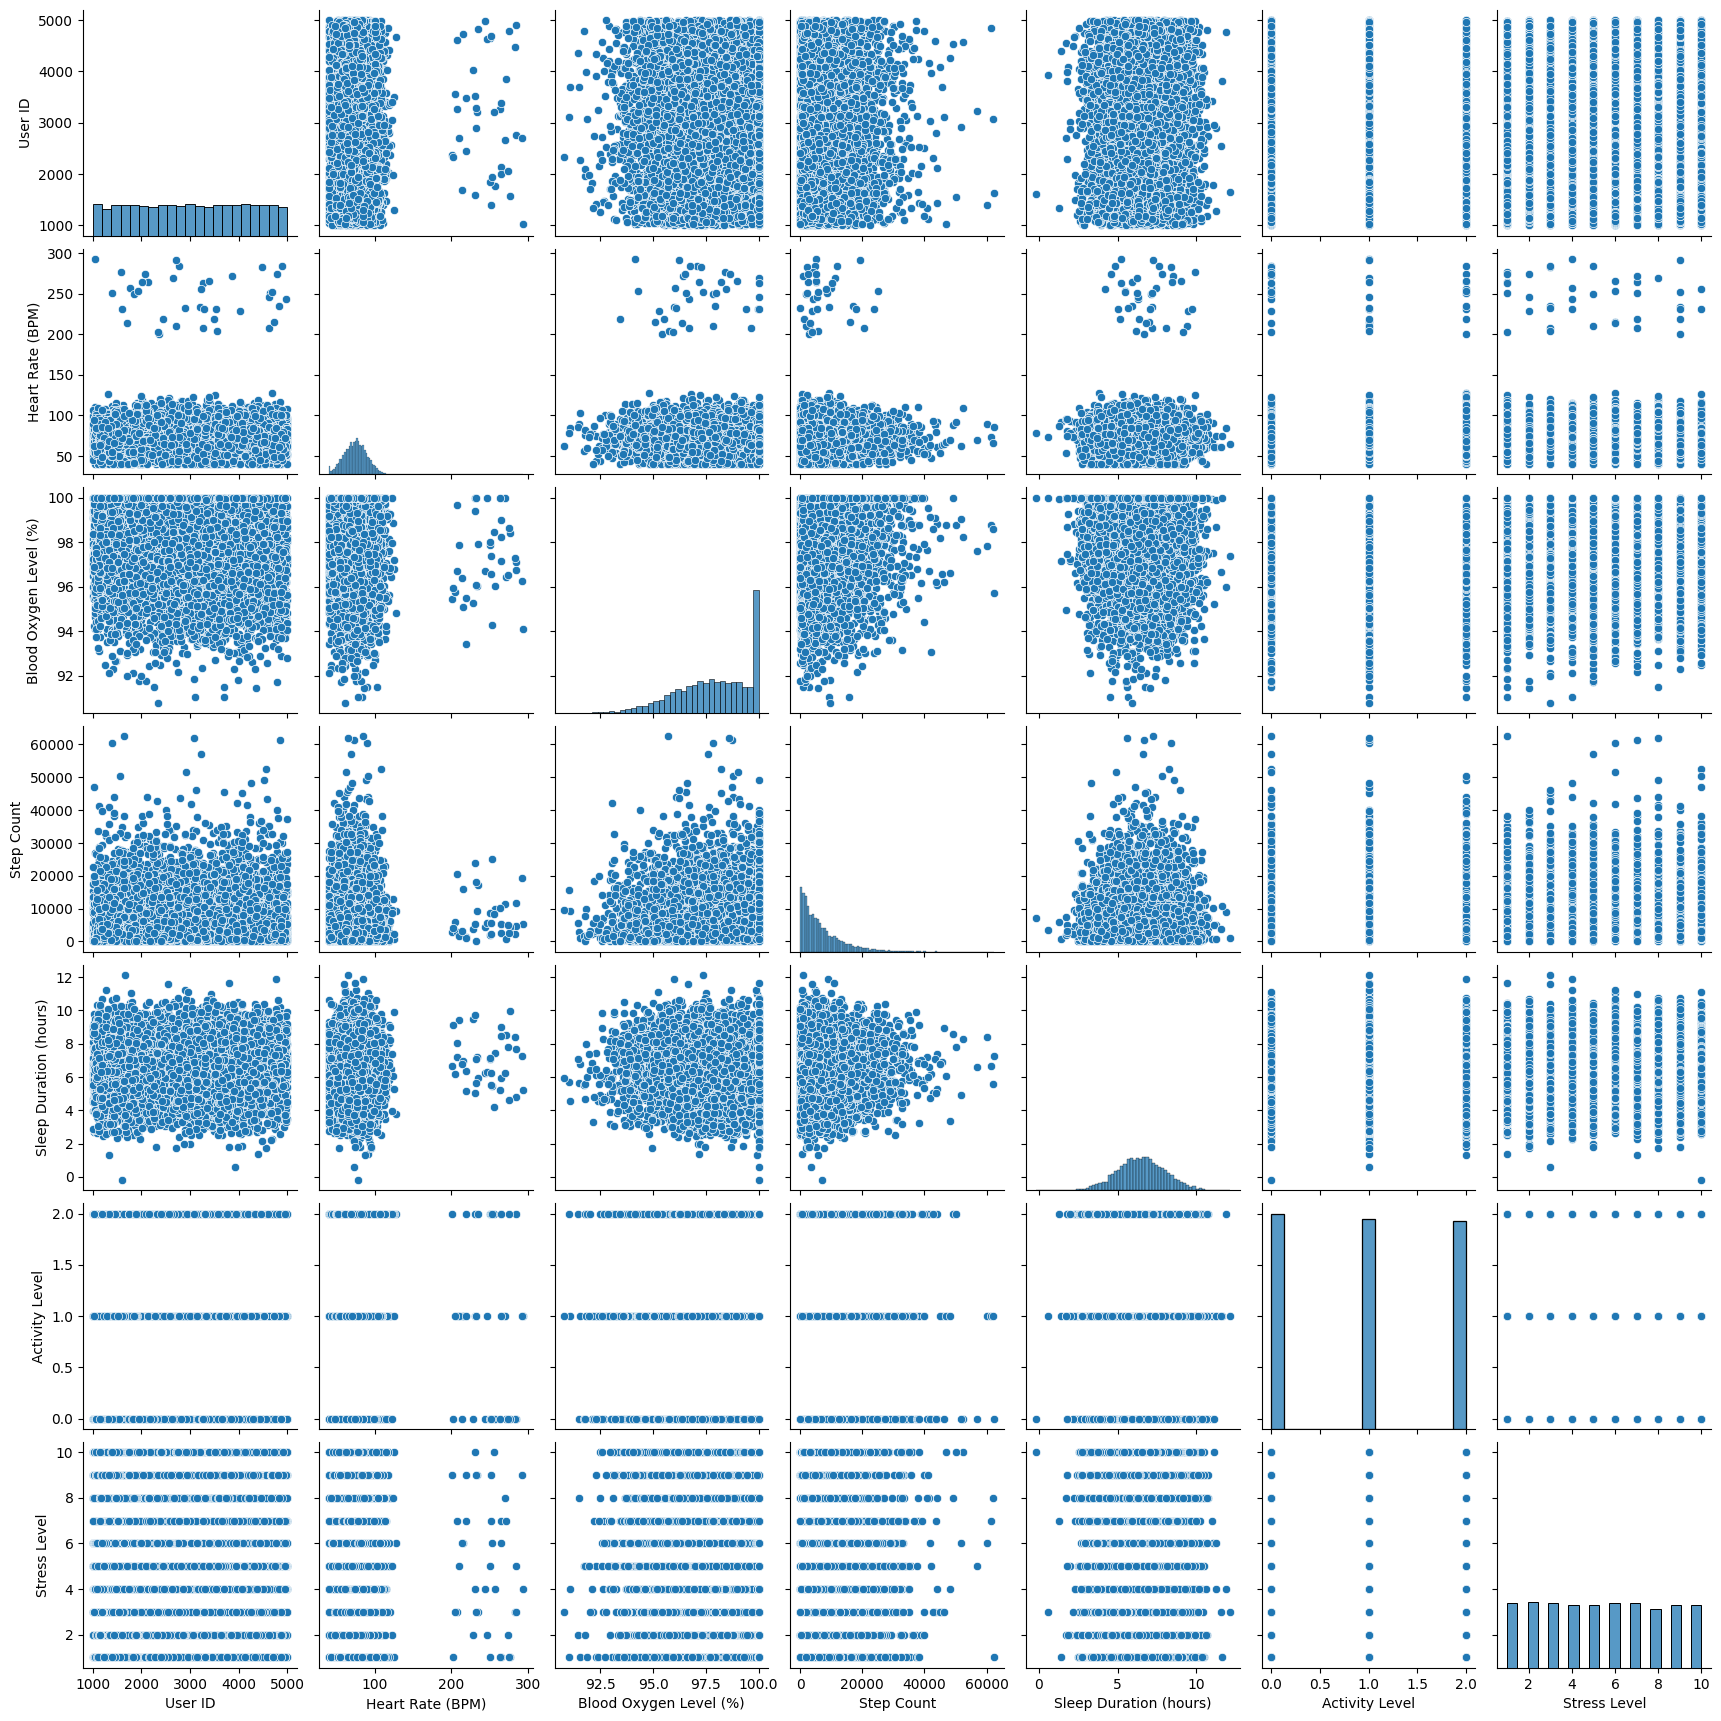

In [31]:
sns.pairplot(df_smart_clean)
plt.show()

In [32]:
df_smart.groupby('User ID').count()

,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
User ID,,,,,,
1001.0,4,4,4,4,4,4
1002.0,2,2,2,2,2,2
1003.0,1,1,1,1,1,1
1004.0,1,0,1,1,1,1
1005.0,2,2,2,2,2,2
...,...,...,...,...,...,...
4995.0,1,1,1,1,1,1
4996.0,5,5,5,5,5,5
4997.0,2,2,2,2,2,2
